In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")

# Display more columns
pd.set_option("display.max_columns", None)

# Allow notebook to access src folder
import sys
sys.path.append("../src")

from preprocessing import load_data, preprocess

In [2]:
# Define paths
train_path = "../data/ocpp_app_layer/Combined/Train.csv"
test_path = "../data/ocpp_app_layer/Combined/Test.csv"

# Load raw data using preprocessing module
train_df, test_df = load_data(train_path, test_path)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Apply preprocessing pipeline
X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded = preprocess(train_df, test_df)

print("Feature shape:", X_train_scaled.shape)
print("Label shape:", y_train_encoded.shape)

Train shape: (3020, 55)
Test shape: (1295, 55)
Feature shape: (3020, 51)
Label shape: (3020,)


In [3]:
train_df.head()

,flow_id,src_ip,dst_ip,src_port,dst_port,total_flow_packets,total_fw_packets,total_bw_packets,flow_duration,flow_down_up_ratio,flow_total_SYN_flag,flow_total_RST_flag,flow_total_PSH_flag,flow_total_ACK_flag,flow_total_URG_flag,flow_total_CWE_flag,flow_total_ECE_flag,flow_total_FIN_flag,flow_start_timestamp,flow_end_timestamp,flow_total_http_get_packets,flow_total_http_2xx_packets,flow_total_http_4xx_packets,flow_total_http_5xx_packets,flow_websocket_packts_per_second,fw_websocket_packts_per_second,bw_websocket_packts_per_second,flow_websocket_bytes_per_second,fw_websocket_bytes_per_second,bw_websocket_bytes_per_second,flow_total_websocket_ping_packets,flow_total_websocket_pong_packets,flow_total_websocket_close_packets,flow_total_websocket_data_messages,flow_total_ocpp16_heartbeat_packets,flow_total_ocpp16_resetHard_packets,flow_total_ocpp16_resetSoft_packets,flow_total_ocpp16_unlockconnector_packets,flow_total_ocpp16_starttransaction_packets,flow_total_ocpp16_remotestarttransaction_packets,flow_total_ocpp16_authorize_not_accepted_packets,flow_total_ocpp16_setchargingprofile_packets,flow_avg_ocpp16_setchargingprofile_limit,flow_max_ocpp16_setchargingprofile_limit,flow_min_ocpp16_setchargingprofile_limit,flow_avg_ocpp16_setchargingprofile_minchargingrate,flow_min_ocpp16_setchargingprofile_minchargingrate,flow_max_ocpp16_setchargingprofile_minchargingrate,flow_total_ocpp16_metervalues,flow_min_ocpp16_metervalues_soc,flow_max_ocpp16_metervalues_soc,flow_avg_ocpp16_metervalues_wh_diff,flow_max_ocpp16_metervalues_wh_diff,flow_min_ocpp16_metervalues_wh_diff,label
0,192.168.21.128-192.168.21.70-33924-80,192.168.21.128,192.168.21.70,33924,80,124,61,63,109681274.0,1.032787,0,0,65,124,0,0,0,0,1.683653e+15,1.683653e+15,0,0,0,0,5.926262e-07,2.917545e-07,3.008718e-07,0.000061,0.000051,0.000010,5,4,0,56,0,0,0,0,4,4,4,0,0.0,0,0,0.0,0,0,8,0.0,0.0,0.0,0,0,cyberattack_ocpp16_doc_idtag
1,192.168.21.225-192.168.21.70-43060-80,192.168.21.225,192.168.21.70,43060,80,11,6,5,10878.0,0.833333,3,0,2,9,0,0,0,2,1.719082e+15,1.719082e+15,1,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,cyberattack_ocpp16_unauthorized_access
2,192.168.21.225-192.168.21.70-54402-80,192.168.21.225,192.168.21.70,54402,80,11,6,5,17714.0,0.833333,3,0,2,9,0,0,0,2,1.719082e+15,1.719082e+15,1,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,cyberattack_ocpp16_unauthorized_access
3,192.168.21.128-192.168.21.70-55498-80,192.168.21.128,192.168.21.70,55498,80,115,52,63,97371003.0,1.211538,0,0,63,115,0,0,0,0,1.683777e+15,1.683778e+15,0,0,0,0,6.470099e-07,3.183699e-07,3.286399e-07,0.000069,0.000057,0.000012,4,4,0,55,0,0,0,0,5,3,4,0,0.0,0,0,0.0,0,0,8,0.0,0.0,0.0,0,0,cyberattack_ocpp16_doc_idtag
4,192.168.21.225-192.168.21.70-57601-80,192.168.21.225,192.168.21.70,57601,80,11,6,5,12521.0,0.833333,3,0,2,9,0,0,0,2,1.719082e+15,1.719082e+15,1,0,1,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0.0,0.0,0.0,0,0,cyberattack_ocpp16_unauthorized_access


In [4]:
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 55 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   flow_id                                             3020 non-null   str    
 1   src_ip                                              3020 non-null   str    
 2   dst_ip                                              3020 non-null   str    
 3   src_port                                            3020 non-null   int64  
 4   dst_port                                            3020 non-null   int64  
 5   total_flow_packets                                  3020 non-null   int64  
 6   total_fw_packets                                    3020 non-null   int64  
 7   total_bw_packets                                    3020 non-null   int64  
 8   flow_duration                                       3020 non-null   float64
 9   flow_dow

In [5]:
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Missing values per column:")
missing_values

Missing values per column:


Series([], dtype: int64)

In [6]:
print(train_df.columns)

Index(['flow_id', 'src_ip', 'dst_ip', 'src_port', 'dst_port',
       'total_flow_packets', 'total_fw_packets', 'total_bw_packets',
       'flow_duration', 'flow_down_up_ratio', 'flow_total_SYN_flag',
       'flow_total_RST_flag', 'flow_total_PSH_flag', 'flow_total_ACK_flag',
       'flow_total_URG_flag', 'flow_total_CWE_flag', 'flow_total_ECE_flag',
       'flow_total_FIN_flag', 'flow_start_timestamp', 'flow_end_timestamp',
       'flow_total_http_get_packets', 'flow_total_http_2xx_packets',
       'flow_total_http_4xx_packets', 'flow_total_http_5xx_packets',
       'flow_websocket_packts_per_second', 'fw_websocket_packts_per_second',
       'bw_websocket_packts_per_second', 'flow_websocket_bytes_per_second',
       'fw_websocket_bytes_per_second', 'bw_websocket_bytes_per_second',
       'flow_total_websocket_ping_packets',
       'flow_total_websocket_pong_packets',
       'flow_total_websocket_close_packets',
       'flow_total_websocket_data_messages',
       'flow_total_ocpp16_hear

In [7]:
train_df["label"].value_counts()

label
cyberattack_ocpp16_doc_idtag                 604
cyberattack_ocpp16_unauthorized_access       604
cyberattack_ocpp16_dos_flooding_heartbeat    604
cyberattack_ocpp16_fdi_chargingprofile       604
normal                                       604
Name: count, dtype: int64

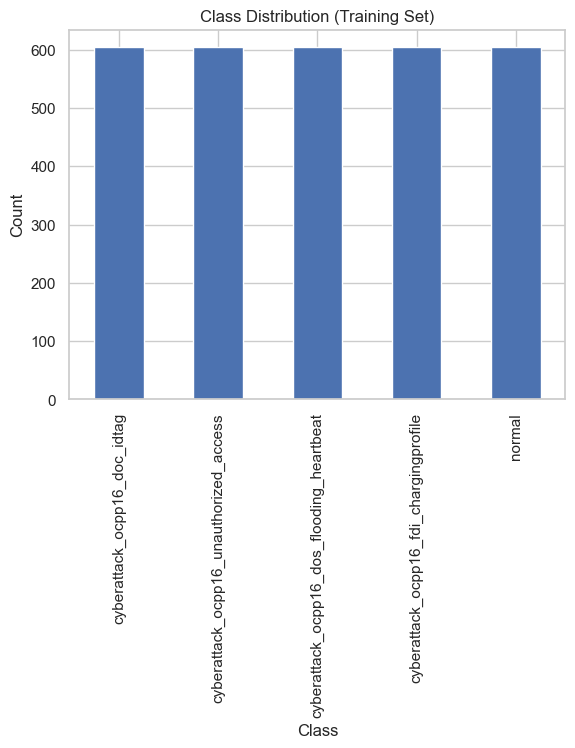

In [8]:
plt.figure()
train_df["label"].value_counts().plot(kind="bar")
plt.title("Class Distribution (Training Set)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.savefig("../outputs/figures/class_distribution.png")
plt.show()

In [9]:
train_df.describe()

,src_port,dst_port,total_flow_packets,total_fw_packets,total_bw_packets,flow_duration,flow_down_up_ratio,flow_total_SYN_flag,flow_total_RST_flag,flow_total_PSH_flag,flow_total_ACK_flag,flow_total_URG_flag,flow_total_CWE_flag,flow_total_ECE_flag,flow_total_FIN_flag,flow_start_timestamp,flow_end_timestamp,flow_total_http_get_packets,flow_total_http_2xx_packets,flow_total_http_4xx_packets,flow_total_http_5xx_packets,flow_websocket_packts_per_second,fw_websocket_packts_per_second,bw_websocket_packts_per_second,flow_websocket_bytes_per_second,fw_websocket_bytes_per_second,bw_websocket_bytes_per_second,flow_total_websocket_ping_packets,flow_total_websocket_pong_packets,flow_total_websocket_close_packets,flow_total_websocket_data_messages,flow_total_ocpp16_heartbeat_packets,flow_total_ocpp16_resetHard_packets,flow_total_ocpp16_resetSoft_packets,flow_total_ocpp16_unlockconnector_packets,flow_total_ocpp16_starttransaction_packets,flow_total_ocpp16_remotestarttransaction_packets,flow_total_ocpp16_authorize_not_accepted_packets,flow_total_ocpp16_setchargingprofile_packets,flow_avg_ocpp16_setchargingprofile_limit,flow_max_ocpp16_setchargingprofile_limit,flow_min_ocpp16_setchargingprofile_limit,flow_avg_ocpp16_setchargingprofile_minchargingrate,flow_min_ocpp16_setchargingprofile_minchargingrate,flow_max_ocpp16_setchargingprofile_minchargingrate,flow_total_ocpp16_metervalues,flow_min_ocpp16_metervalues_soc,flow_max_ocpp16_metervalues_soc,flow_avg_ocpp16_metervalues_wh_diff,flow_max_ocpp16_metervalues_wh_diff,flow_min_ocpp16_metervalues_wh_diff
count,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3.020000e+03,3020.000000,3020.000000,3020.00000,3020.000000,3020.000000,3020.0,3020.0,3020.0,3020.000000,3.020000e+03,3.020000e+03,3020.000000,3020.000000,3020.000000,3020.0,3.020000e+03,3.020000e+03,3.020000e+03,3.020000e+03,3.020000e+03,3.020000e+03,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.0,3020.000000,3020.0,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.0,3020.0,3020.000000,3020.000000,3020.000000
mean,36388.874503,8889.488742,381.877815,204.976490,176.901325,8.205879e+07,0.973291,0.730795,0.02351,211.651987,381.368543,0.0,0.0,0.0,0.432781,1.698347e+15,1.698347e+15,0.286755,0.002318,0.200000,0.0,3.102043e-06,1.515538e-06,1.586506e-06,6.515595e-04,2.950851e-04,3.564744e-04,2.427152,2.094371,0.010596,206.438411,95.836755,0.0,0.000331,0.0,0.748344,0.821192,0.741060,1.874503,19.079055,19.400662,18.155629,1.020199,1.020199,1.020199,1.618212,0.0,0.0,0.073876,0.107616,0.015232
std,19015.692081,18079.749902,663.839683,361.505739,304.727701,4.942255e+07,0.239628,1.297453,0.17008,372.760759,664.108598,0.0,0.0,0.0,0.828715,1.788196e+13,1.788194e+13,1.343056,0.048097,0.400066,0.0,3.056470e-05,1.524149e-05,1.539783e-05,1.527079e-02,7.601607e-03,7.737537e-03,2.345806,2.173960,0.145213,375.179772,190.617079,0.0,0.018197,0.0,1.522139,1.650423,1.508451,2.875087,34.984042,35.468824,34.355018,1.421429,1.421429,1.421429,3.238903,0.0,0.0,1.292444,1.778383,0.579345
min,80.000000,80.000000,2.000000,1.000000,1.000000,0.000000e+00,0.166667,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.682504e+15,1.682504e+15,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,36192.000000,80.000000,11.000000,6.000000,5.000000,2.235422e+07,0.833333,0.000000,0.00000,4.000000,9.000000,0.0,0.0,0.0,0.000000,1.682651e+15,1.682651e+15,0.000000,0.000000,0.000000,0.0,8.315466e-08,3.328106e-08,3.808734e-08,3.661982e-07,1.997244e-07,1.664527e-07,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,

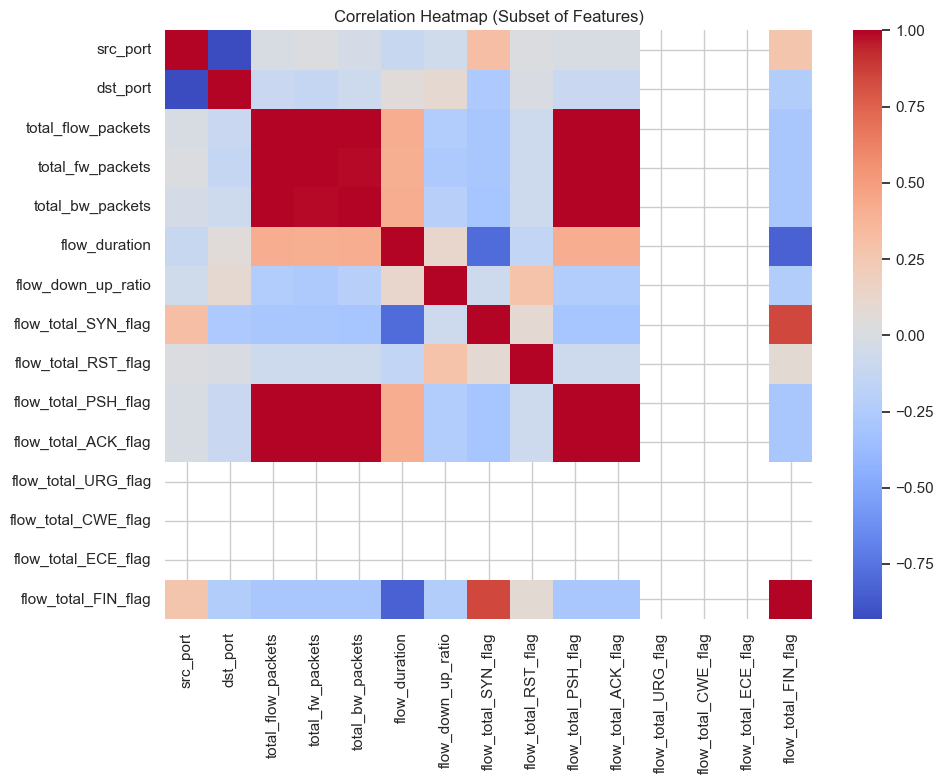

In [10]:
numeric_df = train_df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.iloc[:, :15].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Subset of Features)")
plt.tight_layout()
plt.savefig("../outputs/figures/correlation_heatmap.png")
plt.show()

In [11]:
# Drop columns
columns_to_drop = ["flow_id", "src_ip", "dst_ip"]

train_df = train_df.drop(columns=columns_to_drop, errors='ignore')
test_df = test_df.drop(columns=columns_to_drop, errors='ignore')

print("Dataset shape after dropping columns:", train_df.shape)


# Split features and label
if "label" in train_df.columns:
    X_train = train_df.drop("label", axis=1)
    y_train = train_df["label"]
else:
    print("Label column already separated.")


if "label" in test_df.columns:
    X_test = test_df.drop("label", axis=1)
    y_test = test_df["label"]

print("Feature shape:", X_train.shape)
print("Label shape:", y_train.shape)


# Encode labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Classes:", le.classes_)


# Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled feature shape:", X_train_scaled.shape)

Dataset shape after dropping columns: (3020, 52)
Feature shape: (3020, 51)
Label shape: (3020,)
Classes: ['cyberattack_ocpp16_doc_idtag'
 'cyberattack_ocpp16_dos_flooding_heartbeat'
 'cyberattack_ocpp16_fdi_chargingprofile'
 'cyberattack_ocpp16_unauthorized_access' 'normal']
Scaled feature shape: (3020, 51)


In [12]:
print(train_df.shape)
print(X_train.shape)
print(len(le.classes_))

(3020, 52)
(3020, 51)
5


In [13]:
# Check duplicates
duplicate_rows = train_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [20]:
# outlier detection using IQR on a few key numeric columns
import numpy as np

numeric_cols = train_df.select_dtypes(include=[np.number]).columns

outlier_summary = {}

for col in numeric_cols[:10]:  # check first 10 numeric features
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = train_df[(train_df[col] < Q1 - 1.5 * IQR) | 
                        (train_df[col] > Q3 + 1.5 * IQR)]
    outlier_summary[col] = len(outliers)

print("Outlier count (subset of features):")
print(outlier_summary)

Outlier count (subset of features):
{'src_port': 593, 'dst_port': 593, 'total_flow_packets': 604, 'total_fw_packets': 605, 'total_bw_packets': 604, 'flow_duration': 0, 'flow_down_up_ratio': 158, 'flow_total_SYN_flag': 733, 'flow_total_RST_flag': 63, 'flow_total_PSH_flag': 604}
